In [1]:
# import sys
# sys.path.append('..')

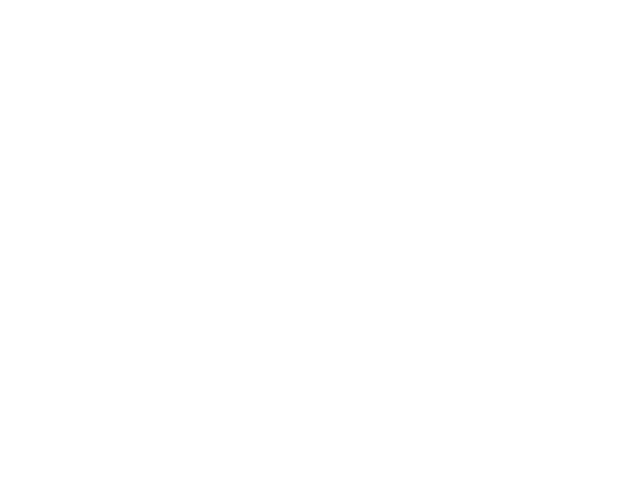

In [2]:
import pandas as pd
import numpy as np
import os
from copy import deepcopy as copy
import time
from datetime import datetime, timedelta
from collections import OrderedDict
import matplotlib as mpl
# mpl.use('TkAgg')
%matplotlib widget
from matplotlib import pyplot as plt
from analysis_utils import filter_df, unique_file_path
import pylab
from sklearn.linear_model import LinearRegression
from math import floor,ceil
import scipy.signal
import psychophysicsUtils
import yaml
import argparse
from pathlib import Path
import platform
from plotting_functions import set_axis_frame, save_fig, set_color_palette


In [3]:
set_color_palette()

In [4]:
from behaviour_analysis import TDAnalysis

In [7]:
args = {'config_file':r'H:\gd_analysis\config\mouse_fam_Sept23_cohort_conf_windows.yaml'}
savedir = Path(r'X:\Dammy\final_figures')
if not savedir.is_dir():
    savedir.mkdir()

In [8]:
with open(args['config_file'], 'r') as file:
    config = yaml.safe_load(file)

datadir = config[f'tdatadir_{platform.system().lower()}']

animals = config['animals2process']
dates = sorted(config['dates2process'])
td_obj = TDAnalysis(datadir,animals,(dates[0],dates[-1]))


In [22]:
conds = ['pattern', 'none']
all_performance_td = [filter_df(td_obj.trialData,['c0','stage3']),filter_df(td_obj.trialData,['c1','stage3'])]
for cond_i, (cond,df) in enumerate(zip(conds,all_performance_td)):
    df =df.assign(condition=np.full_like(df.index,cond)).set_index('condition', append=True)
    # print(df.index)
    all_performance_td[cond_i] = df
    # df.index.reorder_levels(['condition','time','name','date'])
all_performance_df = pd.concat(all_performance_td,axis=0)

In [23]:
unique_sess = []

for a in td_obj.animals:
    if a not in all_performance_df.index.get_level_values('Name'):
        continue
    for d in td_obj.dates:
        if d not in all_performance_df.loc[a].index.get_level_values('date'):
            continue
        unique_sess.append((a,d))
# unique_sess

In [24]:
td_obj.animals

['DO64', 'DO69', 'DO70']

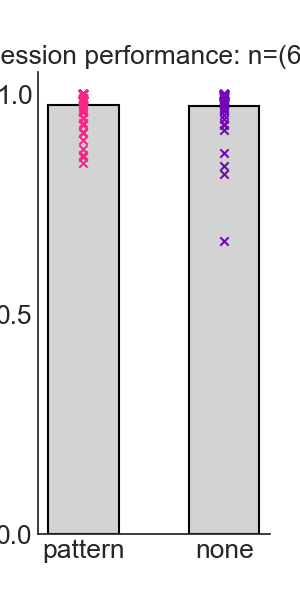

In [25]:
perf_plot =plt.subplots(figsize=(3,6))
for cond_i, cond in enumerate(conds):
    meanss = []
    for sess in unique_sess:
        mean_perf = all_performance_df.loc[sess[0],sess[1],:,cond]['Trial_Outcome'].mean()
        meanss.append(mean_perf)
    perf_plot[1].bar(cond, np.mean(meanss),facecolor=f'lightgrey',edgecolor=f'k',linewidth=1.5,width=0.5)
    perf_plot[1].scatter([cond]*len(meanss), meanss,c=f'C{cond_i}',marker='x')

perf_plot[1].tick_params(labelsize=19)
perf_plot[1].set_ylabel('Mean performance',fontsize=19)
perf_plot[1].set_title(f'Session performance: n=({len(meanss)})',fontsize=19)
perf_plot[1].locator_params(axis='y',nbins=3)
set_axis_frame(perf_plot[1],[False,False,True,True])
# perf_plot[0].savefig(os.path.join(run.figdir,'mean_performance.svg'),bbox_inches='tight')

# perf_plot[0]


In [26]:
savename  = savedir/'mouse_performance_fam.svg'
save_fig(perf_plot[0],unique_file_path(savename))

In [9]:
args = {'config_file':r'H:\gd_analysis\config\mouse_fam_Sept23_cohort_conf_windows.yaml'}
with open(args['config_file'], 'r') as file:
    config = yaml.safe_load(file)

datadir = config[f'tdatadir_{platform.system().lower()}']

animals = config['animals2process']
dates = sorted(config['dates2process'])
td_obj = TDAnalysis(datadir,animals,(dates[0],dates[-1]))

p_rate_dates= td_obj.dates
prate_muscimol_dates = ['230918','230920','230927','230929','231002','231030','231103']
prate_saline_dates = ['230928','231024','231027','231102']
prate_control_dates = [d for d in p_rate_dates if d not in prate_muscimol_dates+prate_saline_dates]
dates_dict = {
    'muscimol': prate_muscimol_dates,
    'saline': prate_saline_dates,
    'control': prate_control_dates,
}


sess_types = ['muscimol','saline','control']
conds = ['pattern', 'none']
all_performance_td = [filter_df(td_obj.trialData,['c0','stage3']),filter_df(td_obj.trialData,['c1','stage3'])]
for cond_i, (cond,df) in enumerate(zip(conds,all_performance_td)):
    df =df.assign(condition=np.full_like(df.index,cond)).set_index('condition', append=True)
    df['sesstype'] = np.full_like(df.index,'a')
    for sess_type in sess_types:
        # print(sess_type)
        # print(df.loc[df.index[df.index.get_level_values('date').isin(dates_dict[sess_type])]].head())
        index_bools = df.index.get_level_values('date').isin(dates_dict[sess_type])
        df.loc[index_bools,'sesstype'] = np.full(index_bools.sum(),sess_type)

    df =df.set_index('sesstype', append=True)
    # print(df.index)
    all_performance_td[cond_i] = df
    # df.index.reorder_levels(['condition','time','name','date'])
all_performance_df = pd.concat(all_performance_td,axis=0)
unique_sess = []

for a in td_obj.animals:
    if a not in all_performance_df.index.get_level_values('Name'):
        continue
    for d in td_obj.dates:
        if d not in all_performance_df.loc[a].index.get_level_values('date'):
            continue
        unique_sess.append((a,d))


2358
7646


In [33]:
all_performance_df['Tone_Position'].rolling(5).sum().head(50)


Name  Date    Trial_Start_dt                 condition  sesstype
DO71  230913  2023-09-13 14:17:33.012723200  pattern    control     NaN
              2023-09-13 14:17:41.706636800  pattern    control     NaN
              2023-09-13 14:18:44.122316800  pattern    control     NaN
              2023-09-13 14:18:56.693632000  pattern    control     NaN
              2023-09-13 14:19:08.327129600  pattern    control     0.0
              2023-09-13 14:19:58.023552000  pattern    control     0.0
              2023-09-13 14:20:11.728972800  pattern    control     0.0
              2023-09-13 14:20:32.782451200  pattern    control     0.0
              2023-09-13 14:20:42.684966400  pattern    control     0.0
              2023-09-13 14:21:40.348352000  pattern    control     0.0
              2023-09-13 14:22:46.795033600  pattern    control     0.0
              2023-09-13 14:23:01.319360000  pattern    control     0.0
              2023-09-13 14:23:29.578124800  pattern    control     0.0

In [21]:
all_performance_df.xs('muscimol',level='sesstype').xs('pattern',level='condition').shape

(2082, 44)

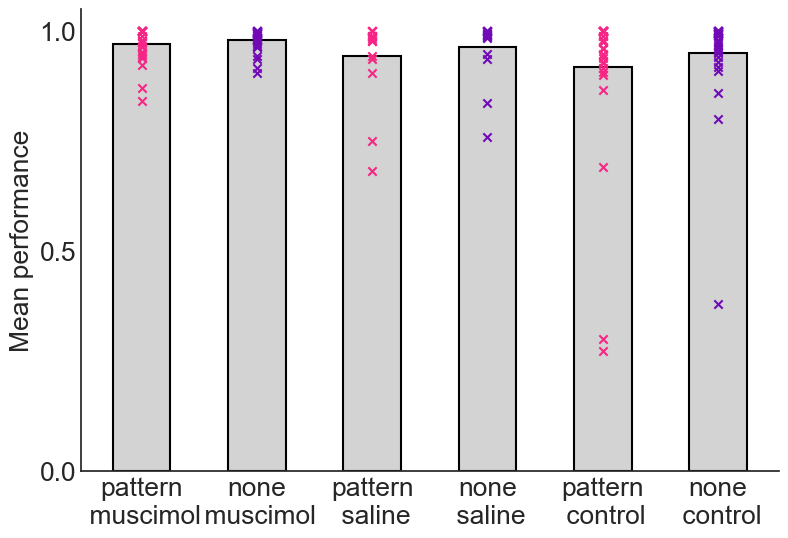

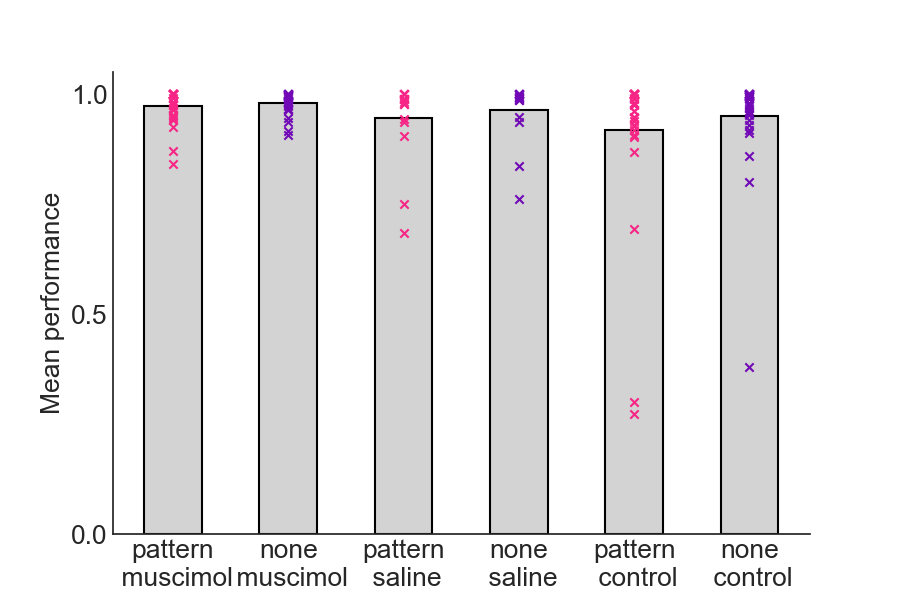

In [29]:
perf_plot =plt.subplots(figsize=(9,6))
for sess_type_i, sess_type in enumerate(sess_types):
    for cond_i, cond in enumerate(conds):
        meanss = []
        for sess in unique_sess:
            mean_perf = all_performance_df.loc[sess[0],sess[1],:,cond,sess_type]['Trial_Outcome'].mean()
            meanss.append(mean_perf)
        perf_plot[1].bar(f'{cond}\n {sess_type}', np.nanmean(meanss),facecolor=f'lightgrey',edgecolor=f'k',linewidth=1.5,width=0.5)
        perf_plot[1].scatter([f'{cond}\n {sess_type}']*len(meanss), meanss,c=f'C{cond_i}',marker='x')

perf_plot[1].tick_params(labelsize=19,rotation=0)
perf_plot[1].set_ylabel('Mean performance',fontsize=19)
perf_plot[1].locator_params(axis='y',nbins=3)
# perf_plot[1].set_title(f'Session performance: n=({len(meanss)})',fontsize=19)
set_axis_frame(perf_plot[1],[False,False,True,True])
# perf_plot[0].savefig(os.path.join(run.figdir,'mean_performance.svg'),bbox_inches='tight')

perf_plot[0]

In [30]:
savename  = savedir/'mouse_musc_sal_cont_performance_fam.svg'
save_fig(perf_plot[0],unique_file_path(savename))